# **Student Roll Number: 22086115**

# **Problem 01: Plotting Line and Points**

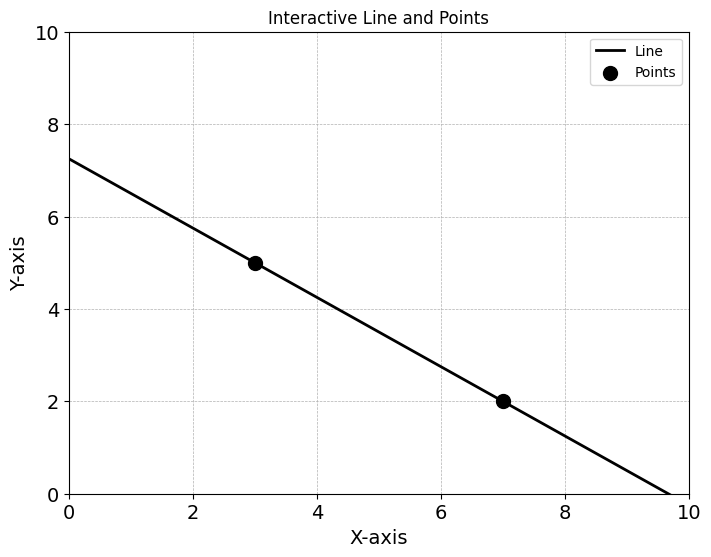

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Given points
x1, y1 = 3, 5
x2, y2 = 7, 2

# Calculate slope (m) and y-intercept (b)
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Define the line as a function
def line(x):
    return m * x + b

# Generate x values from 0 to 10 for plotting the line
x_values = np.linspace(0, 10, 100)
y_values = line(x_values)

# Create the plot
plt.figure(figsize=(8,6))

# Plotting the line
plt.plot(x_values, y_values, label='Line', color='black', linewidth=2)

# Highlighting the points
plt.scatter([x1, x2], [y1, y2], color='black', s=100, zorder=5, label='Points')

# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Setting the x and y axis limits
plt.xlim(0, 10)
plt.ylim(0, 10)

# Labeling the axes
plt.title('Interactive Line and Points')
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)

# Setting tick labels size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Show plot
plt.legend()
plt.show()

In [35]:
import plotly.graph_objects as go
import numpy as np

# Given points
x1, y1 = 3, 5
x2, y2 = 7, 2

# Calculate slope (m) and y-intercept (b)
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

# Define the line as a function
def line(x):
    return m * x + b

# Generate x values from 0 to 10 for plotting the line
x_values = np.linspace(0, 10, 100)
y_values = line(x_values)

# Create figure
fig = go.Figure()

# Add the line
fig.add_trace(go.Scatter(x=x_values, y=y_values, mode='lines', name='Line', line=dict(color='black')))

# Add points
fig.add_trace(go.Scatter(x=[x1, x2], y=[y1, y2], mode='markers', name='Points', marker=dict(color='black', size=10),
                         text=["(3, 5)", "(7, 2)"], hoverinfo='text'))

# Setting the layout for our plot
fig.update_layout(title='Interactive Line and Points',
                  xaxis_title='X-axis',
                  yaxis_title='Y-axis',
                  margin=dict(l=40, r=40, t=40, b=40),
                  paper_bgcolor="LightSteelBlue",)

# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Show figure
fig.show()

# **Problem 02: Dataset Exploration**

### **Load the Dataset**

First, we need to load the Parquet file into a pandas DataFrame. Make sure you have pyarrow or fastparquet installed, as pandas relies on these for Parquet file support.

In [3]:
import pandas as pd

# Assuming 'exercises_problem2.parquet' is the file name and it's in your current working directory
df = pd.read_parquet('exercises_problem2.parquet')

# Display the first few rows of the DataFrame to understand its structure
print(df.head())

       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0


### **Initial Data Exploration**

Before plotting, it's crucial to understand the structure of your data: what columns are available, their data types, and basic statistics.

In [5]:
# Basic info about data types and missing values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int16  
dtypes: float64(3), int16(1)
memory usage: 10.3 KB
None


In [6]:
# Descriptive statistics for numerical columns
print(df.describe())

             var1        var2        var3       class
count  400.000000  400.000000  400.000000  400.000000
mean     3.469246    2.576392    6.045638    0.627500
std      3.811159    0.533500    4.219296    0.484076
min     -5.577154    0.444386   -5.132768    0.000000
25%      0.068847    2.346191    2.419225    0.000000
50%      4.968903    2.708548    7.961119    1.000000
75%      7.025826    2.951366    9.840901    1.000000
max      9.425215    3.471373   12.048517    1.000000


In [7]:
# Unique values for categorical data
for column in df.select_dtypes(include=['object', 'category']).columns:
    print(f"{column}:")
    print(df[column].unique())

# **Exploratory data analysis**

### **Histograms for Each Numerical Variable**

Histograms can help us understand the distribution of each numerical variable.

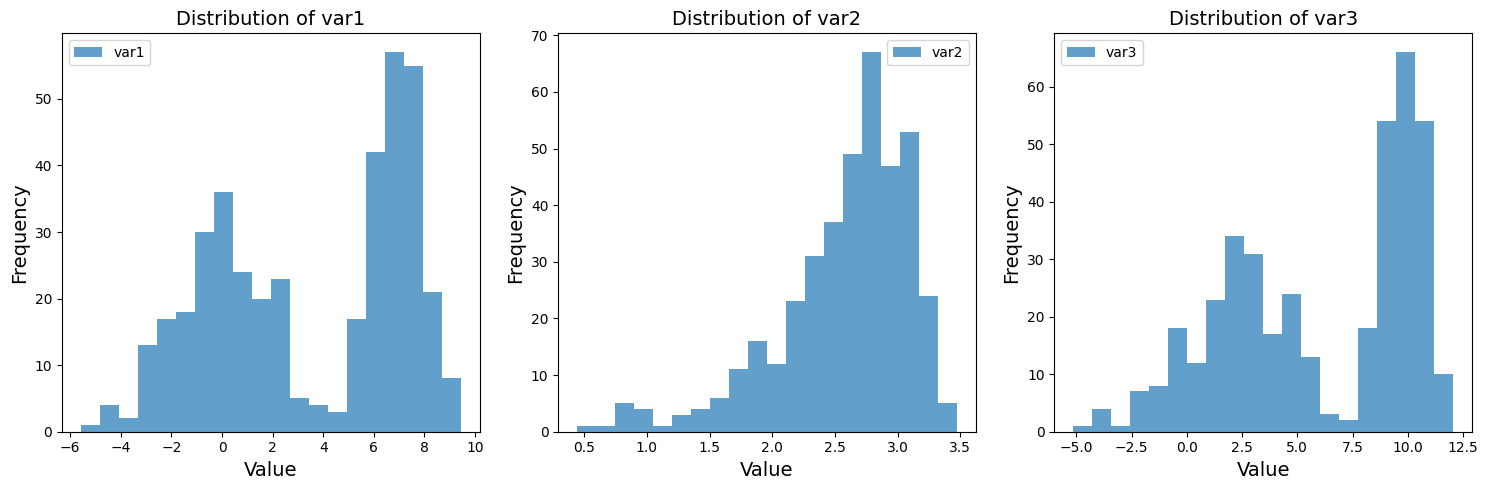

In [13]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Create a figure and a set of subplots. This example arranges the plots in 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))  # Adjust figsize as needed

# Enumerate through the columns and axes simultaneously
for i, column in enumerate(['var1', 'var2', 'var3']):
    # Plot the histogram on the ith subplot
    axes[i].hist(df[column], bins=20, alpha=0.7, label=column)
    axes[i].set_xlabel('Value', fontsize=14)  # Set the x-label
    axes[i].set_ylabel('Frequency', fontsize=14)  # Set the y-label
    axes[i].set_title(f'Distribution of {column}', fontsize=14)  # Set the title
    axes[i].legend()  # Show the legend

# Automatically adjust subplot params so that the subplot(s) fits in to the figure area
plt.tight_layout()
plt.show()

Insight: By comparing the histograms, we can analyze the distribution (e.g., skewness, multimodality) of each variable. For instance, if var1 shows a bimodal distribution, this could indicate two distinct groups within the data not explained by the binary class alone.

### **Box Plots for Numerical Variables by Class**

Box plots can provide insights into the distribution of numerical variables across the different classes.

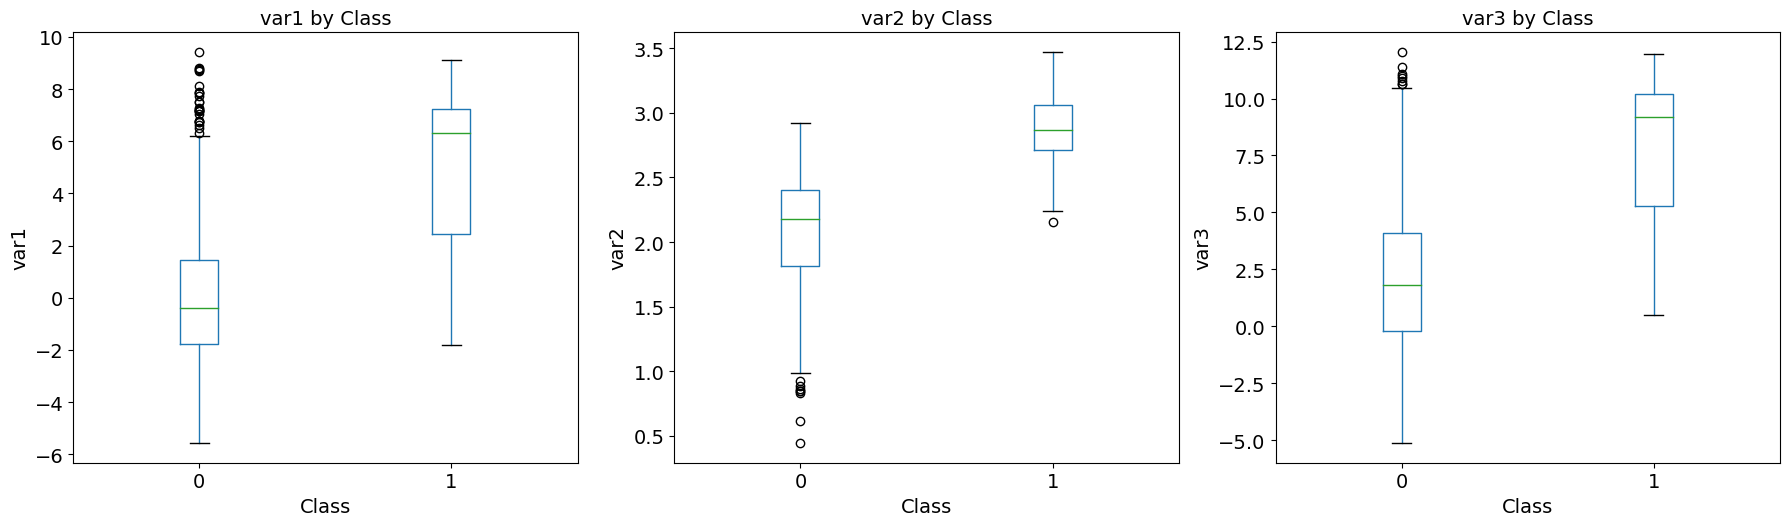

In [12]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots in a 1 row by 3 columns configuration
# figsize is set to ensure there's enough space for each subplot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# List of columns to plot
columns = ['var1', 'var2', 'var3']

# Loop over each subplot axis and the corresponding column name simultaneously
# zip(axes, columns) pairs each ax with a column name
for ax, column in zip(axes, columns):
    # Generate a boxplot for the current column grouped by 'class'
    # ax=ax assigns the boxplot to the current subplot axis
    df.boxplot(column=column, by='class', ax=ax, grid=False)

    # Set the title for the current subplot. fontsize adjusts the title font size
    ax.set_title(f'{column} by Class', fontsize=14)

    # Set the x-axis label to 'Class' and adjust the font size
    ax.set_xlabel('Class', fontsize=14)

    # Set the y-axis label to the current column name and adjust the font size
    ax.set_ylabel(column, fontsize=14)

    # Adjust the tick parameters for both axes to ensure labels are clearly readable
    ax.tick_params(axis='both', which='major', labelsize=14)

# This command removes the automatic 'Boxplot grouped by class' title
# that matplotlib generates for grouped boxplots
plt.suptitle('')

# Adjust the layout to ensure that all elements of the plot are nicely fit within the figure canvas
# rect=[0, 0.03, 1, 0.95] is optional and can be adjusted based on your layout needs
# It helps to prevent overlap of titles, labels, and ticks
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Display the plot
plt.show()

Insight: These plots help identify differences in the central tendency and variability of each variable across classes. For example, significant differences in the medians between classes for a variable might indicate its importance in distinguishing between the classes.

### **Scatter Plots for Pairwise Relationships**

Scatter plots can reveal the relationship between each pair of numerical variables, colored by class.

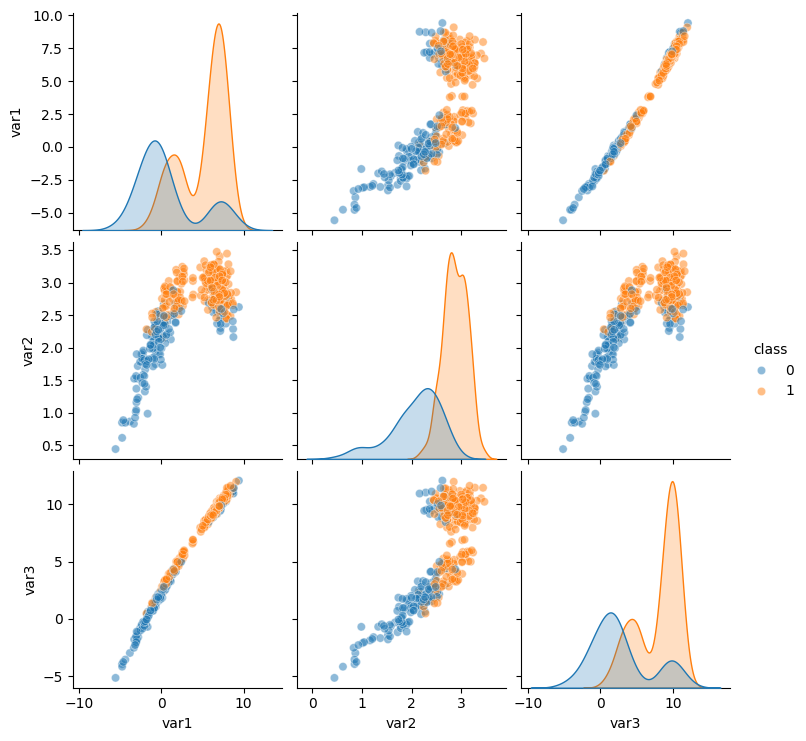

In [18]:
# Import the seaborn library for data visualization
import seaborn as sns

# Create pair plots for the specified variables.
# 'vars=['var1', 'var2', 'var3']' specifies which columns in the DataFrame to include in the plots.
# 'hue='class'' tells seaborn to color the data points differently based on the 'class' column, allowing for visual differentiation of classes.
# 'plot_kws={'alpha': 0.5}' is a dictionary of keyword arguments passed to the plotting function. Here, 'alpha': 0.5 sets the transparency of the points, making it easier to see overlapping points.
sns.pairplot(df, vars=['var1', 'var2', 'var3'], hue='class', plot_kws={'alpha': 0.5})

# Display the plot
plt.show()

Insight: These plots help us identify patterns and relationships between variables, including any observable clusters or distinctions between classes. For example, if points cluster by class within a scatter plot of var1 vs. var2, it suggests a combination of these variables might help in class separation.

### **Correlation Heatmap**

A heatmap of the correlation coefficients between numerical variables helps identify their linear relationship.

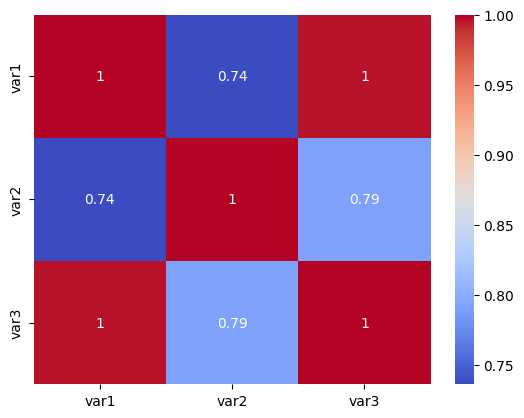

In [19]:
# Calculate the correlation matrix for the specified columns ('var1', 'var2', 'var3') in the DataFrame
corr = df[['var1', 'var2', 'var3']].corr()

# Use seaborn to create a heatmap visualization of the correlation matrix.
# 'annot=True' displays the correlation coefficients on the heatmap for easy interpretation.
# 'cmap='coolwarm'' uses the 'coolwarm' colormap to differentiate positive from negative correlations visually;
# positive correlations will appear in warm colors (reds), and negative correlations in cool colors (blues).
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

Insight: This plot allows us to quickly see if any pairs of variables are particularly correlated or inversely related, which might influence model selection or feature engineering for predictive modeling. For example, a high correlation between two variables might suggest the need for dimensionality reduction techniques.

### **Class Distribution**

A simple bar plot to visualize the distribution of the class variable.

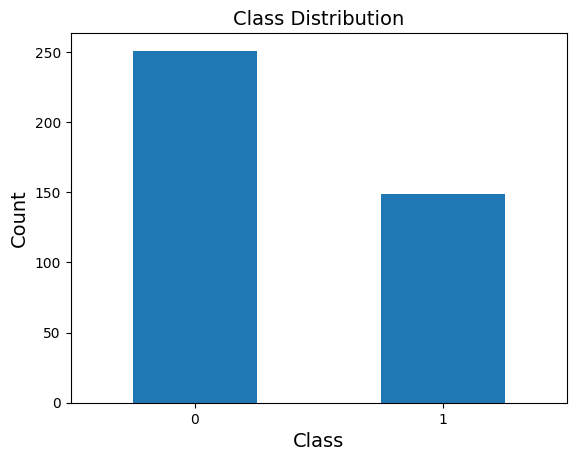

In [17]:
# Assuming df is your DataFrame and it has a column named 'class'
# Count the occurrences of each unique value in the 'class' column
class_counts = df['class'].value_counts()

# Plot the counts as a bar chart
class_counts.plot(kind='bar')

# Label the x-axis as 'Class'
plt.xlabel('Class', fontsize=14)

# Label the y-axis as 'Count'
plt.ylabel('Count', fontsize=14)

# Set the title of the plot
plt.title('Class Distribution', fontsize=14)

# Customize the x-ticks to show the class labels (0 and 1) without rotation for better readability
# 'ticks=[0, 1]' specifies the positions of the ticks; 'labels=['0', '1']' specifies the text for the ticks
plt.xticks(ticks=[0, 1], labels=['0', '1'], rotation=0)

# Display the plot
plt.show()

Insight: This plot helps us understand the balance between classes. An imbalanced dataset might require specific strategies for machine learning modeling, such as weighted loss functions or oversampling.

### **Violin Plot for Numerical Variables by Class**

Violin plots combine aspects of box plots and density plots, showing the distribution of the numerical data across the binary classes.

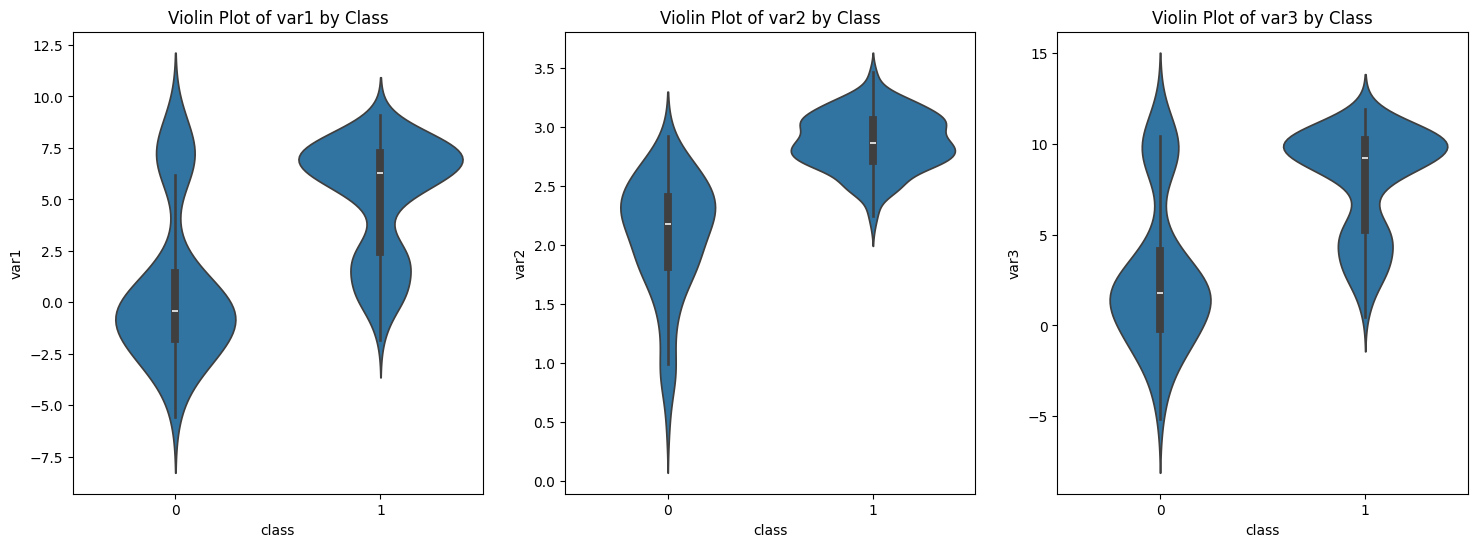

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure object and set the size of the entire figure
plt.figure(figsize=(18, 6))

# List of columns to plot
columns = ['var1', 'var2', 'var3']

# Iterate over the columns, but also use enumerate to get both the column name and an index
for i, column in enumerate(columns, 1):  # Start indexing from 1
    # Create a subplot for each violin plot.
    # '1' indicates there is 1 row of plots, '3' indicates there are 3 plots in this row,
    # and 'i' specifies the position of the current plot.
    plt.subplot(1, 3, i)

    # Create the violin plot for the current column.
    # 'x='class'' specifies the categorical variable, 'y=column' specifies the numerical variable,
    # and 'data=df' specifies the DataFrame containing the data.
    sns.violinplot(x='class', y=column, data=df)

    # Set the title of the current subplot.
    plt.title(f'Violin Plot of {column} by Class')

# After creating all subplots, show the entire figure with the plots.
plt.show()

Insight: This provides a deeper look into the distribution shapes of each variable across classes, including any potential multimodality, which is not evident in box plots.

### **Cumulative Distribution Function (CDF)**

A CDF plot for each numerical variable can give us an idea of the distribution in terms of the proportion of values below a certain threshold.

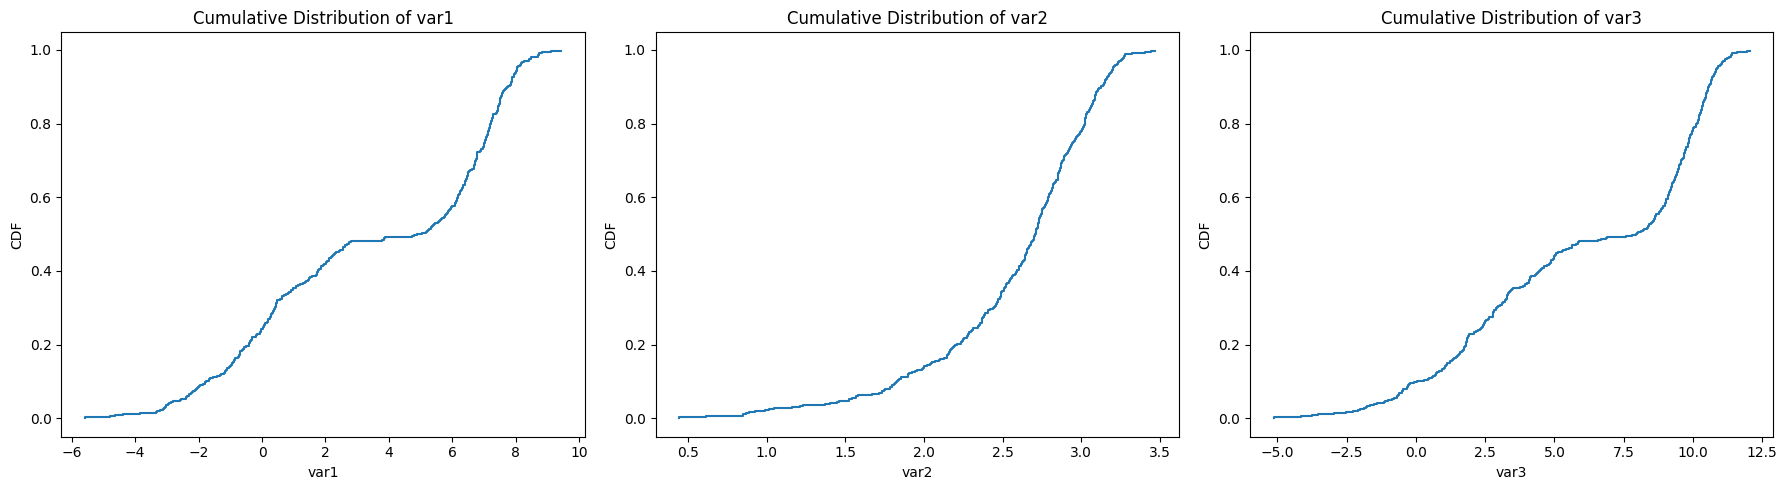

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and an array of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # figsize can be adjusted

# Iterate over the columns to plot and their corresponding axis in axes
for ax, column in zip(axes, ['var1', 'var2', 'var3']):
    # Sort the data in the current column
    data_sorted = np.sort(df[column])

    # Plot the step plot (CDF) on the current axis (ax)
    ax.step(data_sorted, np.arange(data_sorted.size) / float(data_sorted.size))

    # Set the title for the current plot
    ax.set_title(f'Cumulative Distribution of {column}')

    # Label the x-axis with the column name
    ax.set_xlabel(column)

    # Label the y-axis as 'CDF'
    ax.set_ylabel('CDF')

# Adjust the layout to not overlap and display the plot
plt.tight_layout()
plt.show()

Insight: CDFs are particularly useful for identifying skewness, outliers, and the overall spread of data points.

### **Swarm Plot Overlayed with Box Plot**

A swarm plot overlayed with a box plot can provide a detailed view of the distribution of data points across categories, along with the summary statistics.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 6.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


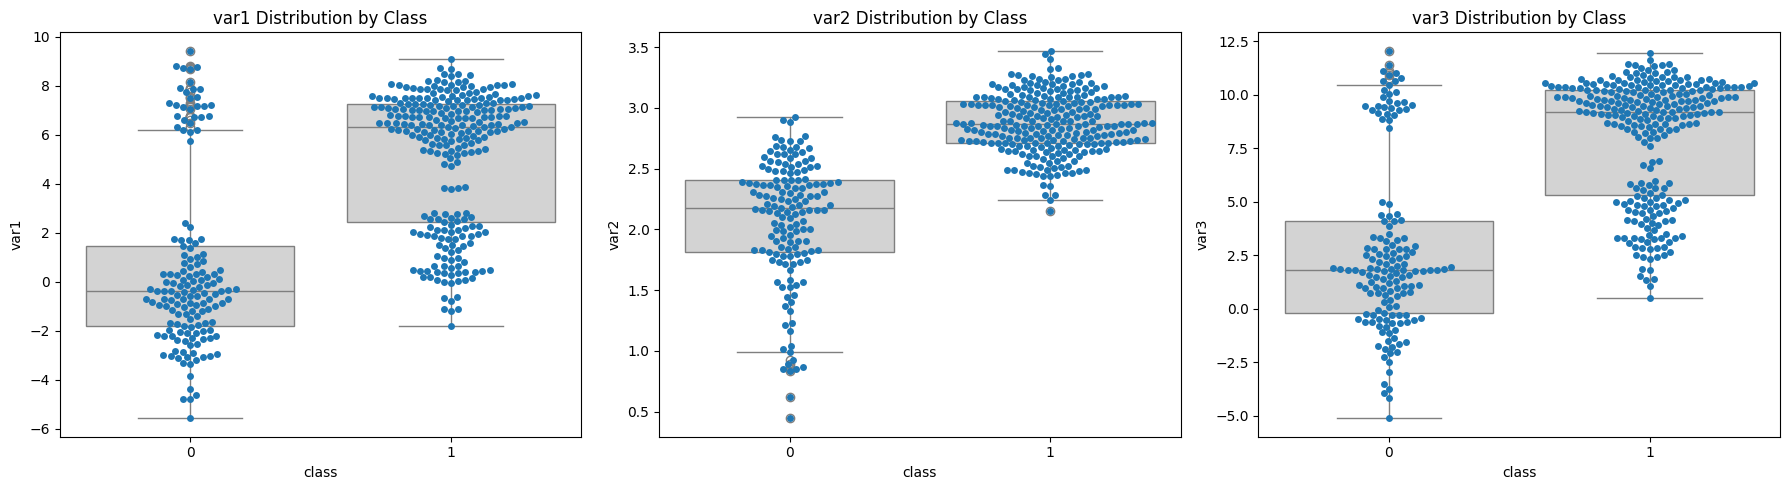

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an array of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust figsize as needed

# Iterate over both the column names and the subplot axes simultaneously
for ax, column in zip(axes, ['var1', 'var2', 'var3']):
    # Create a boxplot on the current axis (ax)
    sns.boxplot(x='class', y=column, data=df, color='lightgrey', ax=ax)

    # Overlay a swarmplot on the same axis (ax)
    sns.swarmplot(x='class', y=column, data=df, ax=ax)

    # Set the title for the current subplot
    ax.set_title(f'{column} Distribution by Class')

# Adjust layout for clarity
plt.tight_layout()

# Display the entire figure with all plots
plt.show()

Insight: This combination allows us to see the distribution's density and individual data points without overlapping, highlighting outliers and the interquartile range.

### **KDE (Kernel Density Estimate) Plot for Numerical Variables**

KDE plots can show the density of data points for each variable, giving an idea of the distribution shape.

<ipython-input-27-ef59489ce8c3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue="class", shade=True, ax=ax)
<ipython-input-27-ef59489ce8c3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue="class", shade=True, ax=ax)
<ipython-input-27-ef59489ce8c3>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df, x=column, hue="class", shade=True, ax=ax)


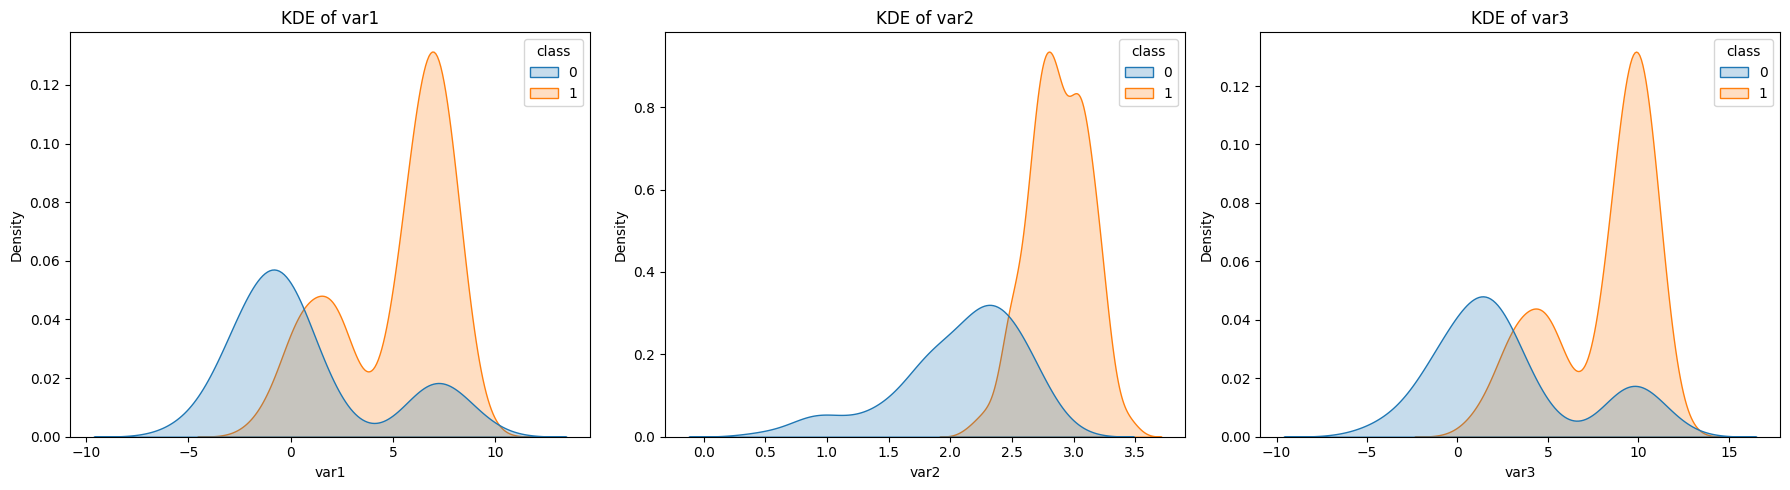

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and an array of subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # Adjust the figsize as needed

# Iterate over both the columns for the KDE plots and the axes of the subplots
for ax, column in zip(axes, ['var1', 'var2', 'var3']):
    # Plot the KDE on the current axis (ax), specifying the data, the column for x, the hue, and to fill the area under the KDE
    sns.kdeplot(data=df, x=column, hue="class", shade=True, ax=ax)

    # Set the title for the current plot using the column name
    ax.set_title(f'KDE of {column}')

# Adjust the layout so everything fits without overlapping
plt.tight_layout()

# Display the figure with all subplots
plt.show()

Insight: KDE plots are useful for visualizing the data's distribution shape and comparing it across the different classes.

### **Facet Grid of Scatter Plots Colored by Class**

Creating a facet grid allows us to plot subsets of data in separate panels side by side, which is useful for comparing patterns across different conditions.

**Scatterplot between var1 and var2 separated by class**

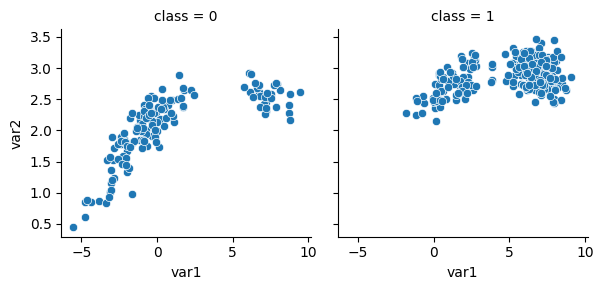

In [30]:
# Create a FacetGrid. This allows us to create a grid of plots based on the 'class' column, facilitating comparisons between classes.
g = sns.FacetGrid(df, col="class")
# Map a scatterplot onto each facet, specifying 'var1' as x-axis and 'var2' as y-axis.
g.map_dataframe(sns.scatterplot, x="var1", y="var2")
# Add a legend to the plot to identify each class in the scatterplot.
g.add_legend()
# Display the plot.
plt.show()

**Scatterplot between var1 and var3 separated by class**

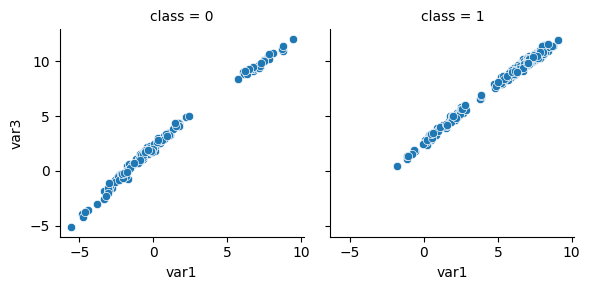

In [31]:
# Initialize a FacetGrid object with the DataFrame 'df', creating a column of plots for each unique value in the 'class' column.
g = sns.FacetGrid(df, col="class")
# Use map_dataframe to apply a scatterplot on each facet, plotting 'var1' against 'var3'.
g.map_dataframe(sns.scatterplot, x="var1", y="var3")
# Add a legend to the grid to help identify the data points belonging to each class.
g.add_legend()
# Show the resulting scatter plots.
plt.show()

**Scatterplot between var2 and var3 separated by class**

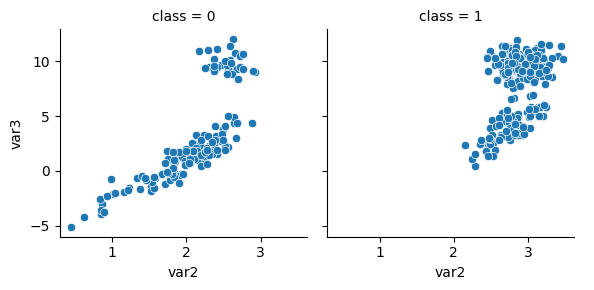

In [32]:
# Set up a FacetGrid with the DataFrame, organizing the plots by the 'class' column so each class gets its own subplot.
g = sns.FacetGrid(df, col="class")
# For each subplot (facet), draw a scatterplot comparing 'var2' and 'var3'.
g.map_dataframe(sns.scatterplot, x="var2", y="var3")
# Include a legend in the grid for clarity on class identification.
g.add_legend()
# Render the complete set of plots.
plt.show()

Insight: These plots are particularly useful for identifying how relationships between variables might differ across classes, offering clues to interactions that might be relevant for classification.